In [1]:
import json
import argparse
import os
import eval_utils as EU
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from gensim.models import KeyedVectors

%load_ext autoreload
%autoreload 2

In [2]:
embedding_storage = {"node2vec": '../node2vec/emb/', "ProNE": '../ProNE/emb/'}

with open("../embedding_config.json", "r") as jsonfile:
    embeddding_config = json.load(jsonfile)
num_bins = embeddding_config["num_bins"]
test_size = embeddding_config["test_size"]

In [3]:
task = "kraken"
with open("../data/data_config.txt", "r") as jsonfile:
    data_config = json.load(jsonfile)
with open("../data/strategies/" + task + ".txt", "r") as jsonfile:
    strategies = json.load(jsonfile)
config = data_config[task]
location = config["location"]
target_file = config["target_file"]
location_processed = config["location_processed"]
target_column = config["target_column"]

In [7]:
target_file

'base_processed.csv'

In [4]:
small_table = pd.read_csv(os.path.join("../", location + target_file),
                         sep=',',
                         encoding='latin')
full_table = pd.read_csv(os.path.join("../", location + ".csv"),
                         sep=',',
                         encoding='latin')

Y = small_table[target_column[0]]
Y = pd.Categorical(Y).codes

FileNotFoundError: [Errno 2] File b'.././data/kraken/.csv' does not exist: b'.././data/kraken/.csv'

In [6]:
for col in full_table.columns: 
    if full_table[col].dtype in ["str", "object"]:
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(full_table[col])
        full_table[col] = integer_encoded
        print(integer_encoded)


In [7]:
small_table

,GeneID,Localization
0,G234064,cytoplasm
1,G234065,cytoplasm
2,G234070,cytoskeleton
3,G234073,cytoplasm
4,G234074,cytoplasm
...,...,...
857,G240410,cytoplasm
858,G240468,cytoplasm
859,G240490,nucleus
860,G240494,cytoplasm


In [8]:
label_encoder = LabelEncoder()
small_table['GeneID'] = label_encoder.fit_transform(small_table['GeneID'])
small_table

,GeneID,Localization
0,0,cytoplasm
1,1,cytoplasm
2,2,cytoskeleton
3,3,cytoplasm
4,4,cytoplasm
...,...,...
857,857,cytoplasm
858,858,cytoplasm
859,859,nucleus
860,860,cytoplasm


In [9]:
X = pd.merge(small_table, full_table, left_on = "GeneID", right_on = 'GeneID', how = "left").drop_duplicates(subset=["GeneID"])

In [10]:
X = X.drop(columns="Localization")

In [11]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

a,b,c,d = train_test_split(X, Y, test_size = 0.2)
print(confusion_matrix(d,d).diagonal())
confusion_matrix(c,c).diagonal()

[ 8  1 41 14 13 13 71  1  2  3  6]


array([ 35, 150,  44,   4,   2,  22,   3,   1,  56, 296,   9,  41,  14,
        12])

In [12]:
74/confusion_matrix(d, d).diagonal().sum()

0.4277456647398844

In [13]:
292/confusion_matrix(c, c).diagonal().sum()

0.42380261248185774

/home/cc/miniconda3/envs/new-py3-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


Train accuracy 1.0, Test accuracy 0.5953757225433526


/home/cc/miniconda3/envs/new-py3-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/home/cc/miniconda3/envs/new-py3-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/cc/miniconda3/envs/new-py3-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/cc/miniconda3/envs/new-py3-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/cc/miniconda3/envs/new-py3-env/lib/python3.

Train accuracy 0.45428156748911463, Test accuracy 0.4393063583815029


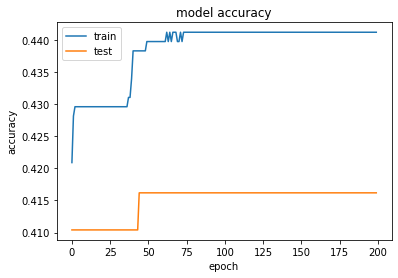

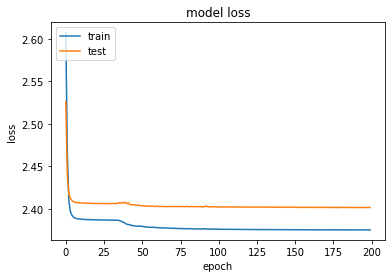

Train accuracy 0.4412191582002903, Test accuracy 0.4161849710982659


(0.4412191582002903, 0.4161849710982659)

<Figure size 432x288 with 0 Axes>

In [14]:
EU.classification_task_rf(a,b,c,d)
EU.classification_task_logr(a,b,c,d)
EU.classification_task_nn(a,b,c,d)

In [15]:
task = "movielens"
with open("../data/data_config.txt", "r") as jsonfile:
    data_config = json.load(jsonfile)
with open("../data/strategies/" + task + ".txt", "r") as jsonfile:
    strategies = json.load(jsonfile)
config = data_config[task]
location = config["location"]
target_file = config["target_file"]
location_processed = config["location_processed"]
target_column = config["target_column"]

In [16]:
small_table = pd.read_csv(os.path.join("../", location + target_file),
                         sep=',',
                         encoding='latin')
full_table = pd.read_csv(os.path.join("../", location + "users.csv"),
                         sep=',',
                         encoding='latin')

Y = small_table[target_column[0]]
Y = pd.Categorical(Y).codes

In [17]:
for col in full_table.columns: 
    if full_table[col].dtype in ["str", "object"]:
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(full_table[col])
        full_table[col] = integer_encoded
        print(integer_encoded)


In [32]:
1 - 350/(350+858)

0.7102649006622517

In [29]:
X = small_table.drop(columns=["u_gender"])
X

,userid,age,occupation
0,1,1,2
1,51,1,2
2,75,1,2
3,86,1,2
4,99,1,2
...,...,...,...
6034,5658,56,5
6035,5669,56,5
6036,5703,56,5
6037,5948,56,5


In [30]:
a,b,c,d = train_test_split(X, Y, test_size = 0.2)
print(confusion_matrix(d,d).diagonal())
confusion_matrix(c,c).diagonal()

[350 858]


array([1358, 3473])

Train accuracy 0.9987580211136411, Test accuracy 0.640728476821192


/home/cc/miniconda3/envs/new-py3-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/cc/miniconda3/envs/new-py3-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/cc/miniconda3/envs/new-py3-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/cc/miniconda3/envs/new-py3-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/cc/miniconda3/envs/new-py3-env/lib/python3.6/site-pack

Train accuracy 0.7188987787207618, Test accuracy 0.7102649006622517


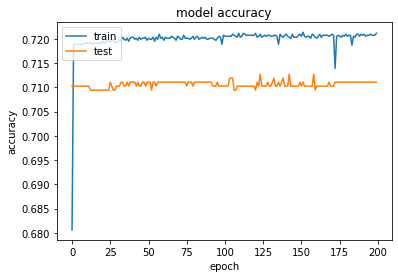

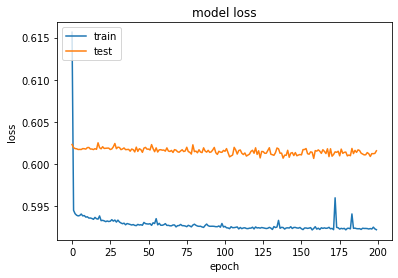

Train accuracy 0.7207617470503002, Test accuracy 0.7110927152317881


(0.7207617470503002, 0.7110927152317881)

<Figure size 432x288 with 0 Axes>

In [33]:
EU.classification_task_rf(a,b,c,d)
EU.classification_task_logr(a,b,c,d)
EU.classification_task_nn(a,b,c,d)

In [5]:
small_table = pd.read_csv(os.path.join("../", location + target_file),
                         sep=',',
                         encoding='latin')
Y = small_table[target_column[0]]
Y = pd.Categorical(Y).codes

small_table = small_table.drop(columns = [target_column[0]])

In [6]:
def all_files_in_path(path, task):
    fs = [
        join(path, f) for f in listdir(path) if isfile(join(path, f))
        and f != ".DS_Store"
    ]
    return fs

def join_tables_kraken(df):
    df_joined = df 
    fs = all_files_in_path(kraken_path, task)
    print(fs)
    for f in fs:
        if f == '../data/kraken/kraken.csv':
            continue 
        df_new = pd.read_csv(f)
        try:
            df_joined = pd.merge(df_joined, df_new, left_on = "event_id", right_on = "event_id", how = "left")
        except:
            print("i can't find matching id column in file %s, skip!" % f)
        print(df_joined.shape)
    return df_joined 

In [7]:

from os import listdir, walk
from os.path import isfile, join
kraken_path = "../data/kraken/"
df = join_tables_kraken(small_table)
df = df.drop(columns = ['result'])

['../data/kraken/kr_array8.csv', '../data/kraken/kr_array14.csv', '../data/kraken/kr_array28.csv', '../data/kraken/kr_array29.csv', '../data/kraken/kr_array15.csv', '../data/kraken/kr_array9.csv', '../data/kraken/kr_array17.csv', '../data/kraken/kr_array16.csv', '../data/kraken/schema.csv', '../data/kraken/kr_array12.csv', '../data/kraken/kr_array13.csv', '../data/kraken/kr_array11.csv', '../data/kraken/kr_sensor4.csv', '../data/kraken/kr_array10.csv', '../data/kraken/kr_sensor109.csv', '../data/kraken/kr_array1.csv', '../data/kraken/base_processed.csv', '../data/kraken/kr_array21.csv', '../data/kraken/kr_array20.csv', '../data/kraken/kr_array0.csv', '../data/kraken/kr_array2.csv', '../data/kraken/kr_array22.csv', '../data/kraken/kr_array23.csv', '../data/kraken/kr_array3.csv', '../data/kraken/kr_array7.csv', '../data/kraken/kr_array27.csv', '../data/kraken/kr_array26.csv', '../data/kraken/kr_array6.csv', '../data/kraken/kr_array4.csv', '../data/kraken/kraken.csv', '../data/kraken/kr_a

In [16]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.1)
EU.classification_task_rf(X_train, X_test, y_train, y_test)

an pred: [1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1]
my pred: [1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1]
Train accuracy 1.0, Test accuracy 0.89


(1.0, 0.89)

In [52]:
X_test

array(['event_id', 'f4k_x', 'f109k_x', 'a8s0', 'a8s1', 'a8s2', 'a8s3',
       'a8s4', 'a8s5', 'a8s6', 'a14s0', 'a14s1', 'a14s2', 'a14s3',
       'a14s4', 'a14s5', 'a14s6', 'a28s0', 'a28s1', 'a28s2', 'a28s3',
       'a28s4', 'a28s5', 'a29s0', 'a29s1', 'a29s2', 'a29s3', 'a29s4',
       'a29s5', 'a15s0', 'a15s1', 'a15s2', 'a15s3', 'a15s4', 'a15s5',
       'a15s6', 'a9s0', 'a9s1', 'a9s2', 'a9s3', 'a9s4', 'a9s5', 'a9s6',
       'a17s0', 'a17s1', 'a17s2', 'a17s3', 'a17s4', 'a17s5', 'a17s6',
       'a16s0', 'a16s1', 'a16s2', 'a16s3', 'a16s4', 'a16s5', 'a16s6',
       'a12s0', 'a12s1', 'a12s2', 'a12s3', 'a12s4', 'a12s5', 'a12s6',
       'a13s0', 'a13s1', 'a13s2', 'a13s3', 'a13s4', 'a13s5', 'a13s6',
       'a11s0', 'a11s1', 'a11s2', 'a11s3', 'a11s4', 'a11s5', 'a11s6',
       'a10s0', 'a10s1', 'a10s2', 'a10s3', 'a10s4', 'a10s5', 'a10s6',
       'a1s0', 'a1s1', 'a1s2', 'a1s3', 'a1s4', 'a1s5', 'a1s6', 'f4k_y',
       'f109k_y', 'result', 'a21s0', 'a21s1', 'a21s2', 'a21s3', 'a21s4',
       'a21s5',